In [2]:
import os
import sys
import xarray as xr
import numpy as np
from datetime import datetime, date
from pathlib import Path
import json
import warnings

In [3]:
# read config jsonc file from ../config
os.chdir('/scratch/wmtsai/featenv_analysis/config/config_pid_env')
feature_json = open('feature_list_default.jsonc')
variable_json = open('varible_list.default.jsonc')
feature_settings = json.load(feature_json)
variable_settings = json.load(variable_json)

In [4]:
year = str(2014)
month = str(1).zfill(2)
day = str(11).zfill(2)
hour = str(20).zfill(2)

# creat a list of data for all variables
env_vars_files = []
for i in range(len(variable_settings['variable_inputs'])):
    
    var_info = variable_settings['variable_inputs'][i]
    var = var_info['var_name']
    data_dir = Path(var_info['var_dir'])
    data_str = var_info['file_str'] 
    # modify the default file string with datetime info
    tmp = data_str.replace('X',var).replace('YYYY',year).replace('MM',month)
    tmp = tmp.replace('DD',day).replace('HH',hour)
    filename = data_dir /'{}'.format(year)/ tmp
    
    env_vars_files.append([var, filename])

In [9]:
for (var_name, file_name) in env_vars_files:
    print(var_name, file_name)

T /neelin2020/ERA-5/NC_FILES/2014/era-5.T.2014.01.nc
q /neelin2020/ERA-5/NC_FILES/2014/era-5.q.2014.01.nc
omega /neelin2020/ERA-5/NC_FILES/2014/era-5.omega.2014.01.nc
2t /neelin2020/ERA-5/NC_FILES/2014/era-5.2t.2014.01.nc
2d /neelin2020/ERA-5/NC_FILES/2014/era-5.2d.2014.01.nc
sp /neelin2020/ERA-5/NC_FILES/2014/era-5.sp.2014.01.nc


In [11]:
%%time
test2 = xr.open_dataset('/scratch/wmtsai/featenv_analysis/dataset/test/ds_dilation_test2_compress.nc').compute()

CPU times: user 375 ms, sys: 79.2 ms, total: 455 ms
Wall time: 457 ms


In [54]:
test2

<xarray.Dataset> Size: 207MB
Dimensions:           (samples: 29, ngrids: 10024, level: 27)
Coordinates:
  * ngrids            (ngrids) int64 80kB 0 1 2 3 4 ... 10020 10021 10022 10023
  * level             (level) int32 108B 100 125 150 175 ... 925 950 975 1000
  * samples           (samples) int64 232B 0 1 2 3 4 5 6 ... 23 24 25 26 27 28
Data variables: (12/15)
    pf_mask           (samples, ngrids) float64 2MB 0.0 0.0 0.0 ... nan nan nan
    lat               (samples, ngrids) float64 2MB -60.0 -60.0 ... nan nan
    lon               (samples, ngrids) float64 2MB 67.5 67.75 68.0 ... nan nan
    precipitationCal  (samples, ngrids) float32 1MB 0.0 0.0 0.0 ... nan nan nan
    ar_tag            (samples, ngrids) float32 1MB 0.0 0.0 0.0 ... nan nan nan
    front_c_tag       (samples, ngrids) float32 1MB 1.0 1.0 1.0 ... nan nan nan
    ...                ...
    t                 (samples, ngrids, level) float64 63MB 224.6 224.1 ... nan
    q                 (samples, ngrids, level) float64 63MB 2.433e-06 ... nan
    w                 (samples, ngrids, level) float64 63MB 0.01298 ... nan
    VAR_2T            (samples, ngrids) float32 1MB 273.9 273.9 ... nan nan
    VAR_2D            (samples, ngrids) float32 1MB 273.4 273.4 ... nan nan
    SP                (samples, ngrids) float64 2MB 9.875e+04 9.875e+04 ... nan
Attributes:
    description:    extracted grids of feature-environment
    lat_res:        0.25
    lon_res:        0.25
    p_level:        27
    selected_PFID:  AR-FT
    created_date:   2024-10-09

In [49]:
sys.path.append('/scratch/wmtsai/featenv_analysis/runscripts')
from PFID_environment_dilation import *

ds_reconstr_xr = reconstruct_geocoords(test2.isel(samples=1))

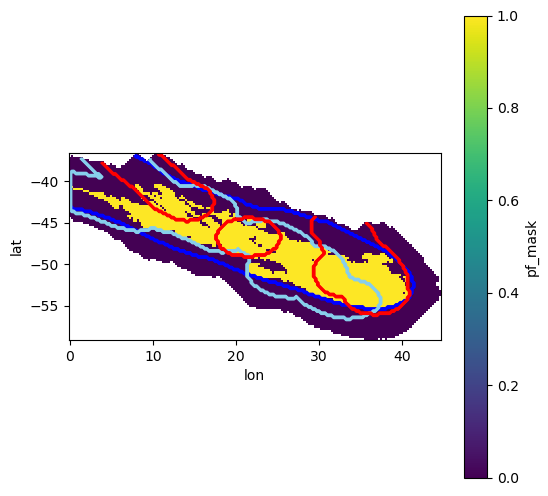

In [50]:
fig, ax1 = plt.subplots(1,1,figsize=(6,6))
ds_reconstr_xr.pf_mask.plot()
ds_reconstr_xr.ar_tag.plot.contour(ax=ax1, colors=['b'])
ds_reconstr_xr.front_c_tag.plot.contour(ax=ax1, colors=['skyblue'])
ds_reconstr_xr.front_w_tag.plot.contour(ax=ax1, colors=['r'])
ds_reconstr_xr.mcs_tag.plot.contour(ax=ax1, colors=['g'])
ax1.set_aspect('equal')
plt.show()

In [19]:
ds_composite = xr.open_dataset('/scratch/wmtsai/featenv_analysis/dataset/test/envs_composite_test2.nc')
ds_composite

<xarray.Dataset> Size: 592kB
Dimensions:           (samples: 29, grid_to_boundary: 28, level: 27)
Coordinates:
  * level             (level) int32 108B 100 125 150 175 ... 925 950 975 1000
  * grid_to_boundary  (grid_to_boundary) int64 224B -15 -14 -13 -12 ... 10 11 12
  * samples           (samples) int64 232B 0 1 2 3 4 5 6 ... 23 24 25 26 27 28
Data variables: (12/13)
    pf_mask           (samples, grid_to_boundary) float64 6kB ...
    precipitationCal  (samples, grid_to_boundary) float64 6kB ...
    ar_tag            (samples, grid_to_boundary) float64 6kB ...
    front_c_tag       (samples, grid_to_boundary) float64 6kB ...
    front_w_tag       (samples, grid_to_boundary) float64 6kB ...
    lps_tag           (samples, grid_to_boundary) float64 6kB ...
    ...                ...
    t                 (samples, grid_to_boundary, level) float64 175kB 220.9 ...
    q                 (samples, grid_to_boundary, level) float64 175kB 2.606e...
    w                 (samples, grid_to_boundary, level) float64 175kB 0.0013...
    VAR_2T            (samples, grid_to_boundary) float64 6kB ...
    VAR_2D            (samples, grid_to_boundary) float64 6kB ...
    SP                (samples, grid_to_boundary) float64 6kB ...

In [60]:
ds_composite['th'] = ds_composite.t*(1000/ds_composite.level)**(287.15/1004)

In [ ]:
ds_composite.differentiate()

(1000.0, 100.0)

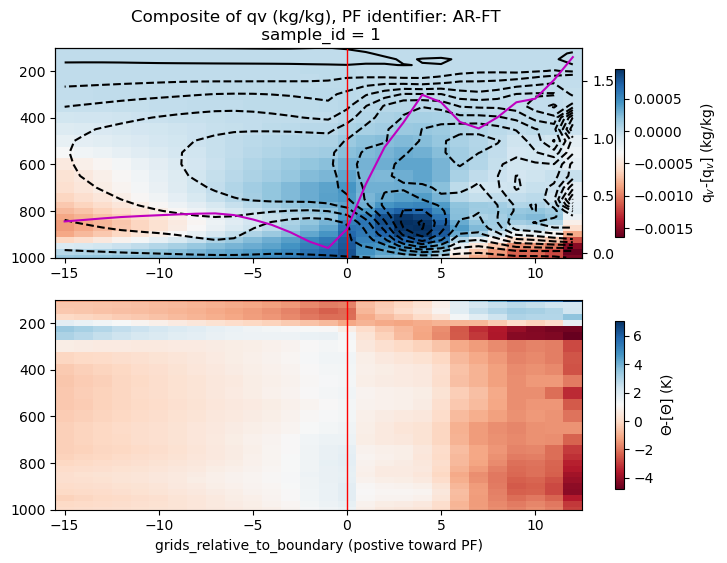

In [81]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8.5,6))
cp1 = ax1.pcolormesh(ds_composite.grid_to_boundary, ds_composite.level,
               (ds_composite.q-ds_composite.q.mean('grid_to_boundary')).isel(samples=1).T, cmap='RdBu')
ax1.contour(ds_composite.grid_to_boundary, ds_composite.level,
            ds_composite.w.isel(samples=1).T, levels=15, colors=['k'])
ax1.vlines(x=0,ymin=100,ymax=1000,color='r',lw=1)
ax1.set_xlabel('')
ax1.set_title('Composite of qv (kg/kg), PF identifier: AR-FT \n sample_id = 1')
ax3 = ax1.twinx()
ax3.plot(ds_composite.grid_to_boundary, ds_composite.precipitationCal.isel(samples=1), color='m')
cbar1 = plt.colorbar(cp1, shrink=0.8)
cbar1.set_label('q$_{v}$-[q$_{v}$] (kg/kg)')

cp2 = ax2.pcolormesh(ds_composite.grid_to_boundary, ds_composite.level,
               (ds_composite.th - ds_composite.th.mean('grid_to_boundary')).isel(samples=1).T, cmap='RdBu')
#ax4.plot(ds_composite.grid_to_boundary, ds_composite.SP.isel(samples=1), color='m')
ax2.vlines(x=0,ymin=100,ymax=1000,color='r',lw=1)
ax2.set_xlabel('grids_relative_to_boundary (postive toward PF)')
cbar2 = plt.colorbar(cp2, shrink=0.8)
cbar2.set_label('$\Theta$-[$\Theta$] (K)')

ax1.set_ylim([1000,100])
ax2.set_ylim([1000,100])

In [ ]:
ds_composite.differentiate()

In [76]:
ds_composite.th.differentiate('grid_to_boundary')

<xarray.DataArray 'th' (samples: 29, grid_to_boundary: 28, level: 27)> Size: 175kB
array([[[ 1.10513561e-01,  3.04166632e-02,  3.07585107e-02, ...,
         -1.87868791e-02, -2.51060073e-02, -2.21434240e-02],
        [ 1.01952531e-01,  2.29953039e-02,  2.36437848e-02, ...,
         -1.48840710e-02, -2.22699140e-02, -1.96239760e-02],
        [ 8.14682292e-02,  6.63799961e-03,  6.63547584e-03, ...,
         -7.83270203e-03, -1.63386906e-02, -1.43886741e-02],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-4.72579724e-03, -4.01139006e-02, -6.46269664e-02, ...,
          7.81719294e-02,  5.73945654e-02,  4.51740854e-02],
        [-5.19396497e-03, -3.84589459e-02, -6.08042316e-02, ...,
          7.85244524e-02,  5.75122995e-02,  4.50899991e-02],
        [-1.29234668e-02, -3.80848735e-02, -5.68971858e-02, ...,
          8.03812603e-02,  5.84252817e-02,  4.56511015e-02],
...
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-1.49168884e-02, -1.71144673e-02, -4.06603505e-02, ...,
         -5.88137501e-02, -6.90872176e-02, -6.77963299e-02],
        [-1.29677277e-02, -1.63948696e-02, -4.56039624e-02, ...,
         -6.11138933e-02, -7.15735142e-02, -7.01853869e-02],
        [-8.55453314e-03, -1.48316075e-02, -5.49281780e-02, ...,
         -6.52475362e-02, -7.65388171e-02, -7.49937245e-02],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * level             (level) int32 108B 100 125 150 175 ... 925 950 975 1000
  * grid_to_boundary  (grid_to_boundary) int64 224B -15 -14 -13 -12 ... 10 11 12
  * samples           (samples) int64 232B 0 1 2 3 4 5 6 ... 23 24 25 26 27 28